To update the imblearn version, at anaconda powershell promt we write:
conda install imbalanced-learn=0.11.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import all the models,scorers,cross_validate,pipeline and scalers
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [3]:
#read the csv and turn it into a panda dataframe
df1 = pd.read_csv('jm1.csv')
#show the 5 first rows to see all the features 
df1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [4]:
#describe the dataset by count,mean,std,min,25%,50%,75%,max
df1.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [5]:
#give the info about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [6]:
#create target column which has the target values of each row for defects
df1['target'] = df1['defects'].astype(int)
#count how many True or False defects we have to see the balance of the set 
df1['defects'].value_counts()  

defects
False    8779
True     2106
Name: count, dtype: int64

In [7]:
#remove function to remove the rows that have ? in them
def remove_rows_with_value(df1, value_to_remove):

    # Use boolean indexing to filter rows with ? in any column
    filtered_df = df1[~df1.isin([value_to_remove]).any(axis=1)]

    return filtered_df
df1 = remove_rows_with_value(df1,'?')
#check the shape of the data frame to see how many rows have been removed
df1.shape

(10880, 23)

In [8]:
#remove the 0 or 1 and True or False columns to make the feature dataset
A1 = df1.drop(['defects','target'], axis=1)
X1 = np.array(A1)

#convert all to float and make them an array
X1 = X1.astype(np.float32)
Y1 = np.array(df1['target'])

#see the shape of the arrays to check if the arrays has the right dimensions
print(X1.shape)
print(Y1.shape)

(10880, 21)
(10880,)


<Figure size 2250x450 with 0 Axes>

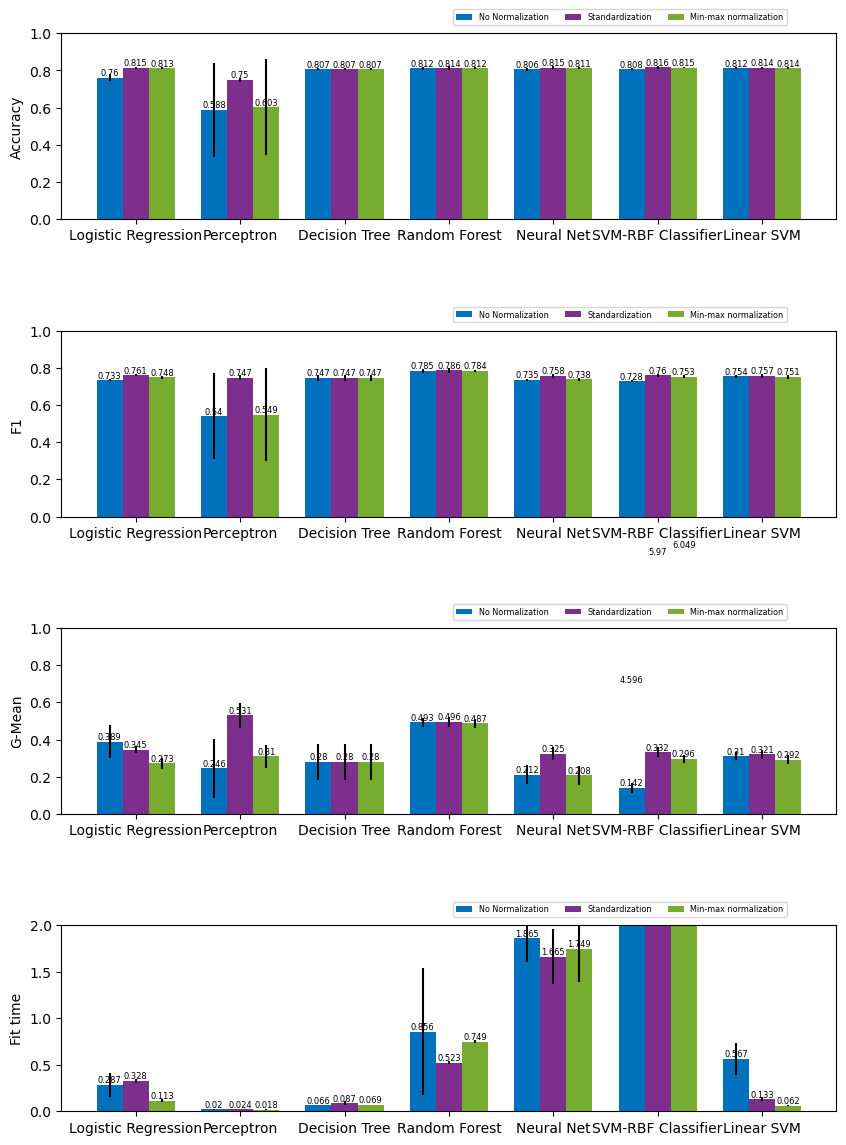

In [10]:
# Define classifiers
classifiers1 = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',max_iter=500,random_state=1),
    'Perceptron': Perceptron(random_state=1),
    'Decision Tree': DecisionTreeClassifier(criterion = 'gini', max_depth = 4,random_state = 1),
    'Random Forest': RandomForestClassifier(criterion='gini', n_estimators=25,random_state=1, n_jobs=2),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, early_stopping=True,activation = 'relu',alpha = 0.3,random_state=1),
    'Svm Rbf': SVC(kernel='rbf',random_state=1),
    'Linear SVM': LinearSVC(dual=False,random_state=1)
}

# Define scalers
scalers = {
    'No Normalization': None,
    'Standardization': StandardScaler(),
    'Min-max normalization': MinMaxScaler()
}

#define scores
scorers = {
'accuracy_score': make_scorer(accuracy_score),
'f1_score': make_scorer(f1_score, average='weighted'),
'precision_score': make_scorer(precision_score, average='weighted',zero_division=0),
'recall_score': make_scorer(recall_score,average='weighted'),
'G_mean':make_scorer(geometric_mean_score, average='binary')}

plt.figure(figsize=(15,3),dpi=150)
bar_width = 0.25

#names of the classifiers for the labes of the bars
clf_names = ['Logistic Regression','Perceptron','Decision Tree','Random Forest','Neural Net','SVM-RBF Classifier','Linear SVM']
x_label = np.arange(7) 

fig, ax = plt.subplots(4, 1,figsize=(10, 14))
plt.subplots_adjust(hspace=0.6)

#random permutations cross-validation(Shuffle & Split) for better results
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

i = 0
# Loop through classifiers and scalers
for clf_name, clf in classifiers1.items():
    j = 0
    for scaler_name, scaler in scalers.items():

        # Prepare the data with the current scaler if needed
        if scaler is not None:
            X1_scaled = scaler.fit_transform(X1)
        else:
            X1_scaled = X1
            
        #define pipeline
        pipe = Pipeline([(scaler_name, scaler), (clf_name,clf)])
        
        #cross validate with the help of the pipeline
        cv_results = cross_validate(pipe, X1_scaled, Y1, cv=cv, scoring=scorers, return_train_score=True, error_score='raise')

        #define the mean of the scorers from 5 fold cross validation
        accuracy1 = cv_results['test_accuracy_score'].mean()
        f11 = cv_results['test_f1_score'].mean()
        fit_time1 = cv_results['fit_time'].mean()
        G_mean1 = cv_results['test_G_mean'].mean()

        #define scores with out mean for the std
        accuracy_std1 = np.std(cv_results['test_accuracy_score'])
        f1_std1 = np.std(cv_results['test_f1_score'])
        G_mean_std1 = np.std(cv_results['test_G_mean'])
        fit_time_std1 = np.std(cv_results['fit_time'])

        if scaler_name == 'Standardization':
            color = '#7E2F8E'
        elif scaler_name == 'Min-max normalization':
            color = '#77AC30'
        else:
            color = '#0072BD'
        if i == 0:
            ax[0].bar(i + j * bar_width, accuracy1, width=bar_width, color=color, yerr=accuracy_std1,label=scaler_name)
            ax[0].text(i + j * bar_width, accuracy1, f"{round(accuracy1, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f11, width=bar_width, color=color,yerr=f1_std1, label=scaler_name)
            ax[1].text(i + j * bar_width, f11, f"{round(f11, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean1, width=bar_width, color=color,yerr=G_mean_std1, label=scaler_name)
            ax[2].text(i + j * bar_width, G_mean1, f"{round(G_mean1, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time1, width=bar_width, color=color,yerr=fit_time_std1, label=scaler_name)
            ax[3].text(i + j * bar_width, fit_time1, f"{round(fit_time1, 3)}", ha='center', va='bottom',fontsize=6)
        else:
            ax[0].bar(i + j * bar_width, accuracy1, width=bar_width, color=color,yerr=accuracy_std1)
            ax[0].text(i + j * bar_width, accuracy1, f"{round(accuracy1, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f11, width=bar_width, color=color,yerr=f1_std1)
            ax[1].text(i + j * bar_width, f11, f"{round(f11, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean1, width=bar_width, color=color,yerr=G_mean_std1)
            ax[2].text(i + j * bar_width, G_mean1, f"{round(G_mean1, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time1, width=bar_width, color=color,yerr=fit_time_std1)
            ax[3].text(i + j * bar_width, fit_time1, f"{round(fit_time1, 3)}", ha='center', va='bottom',fontsize=6)
            
        j += 1
    i += 1

ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(x_label + bar_width, clf_names)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[1].set_ylabel('F1')
ax[1].set_xticks(x_label + bar_width, clf_names)
ax[1].set_ylim(0, 1)
ax[1].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[2].set_ylabel('G-Mean')
ax[2].set_xticks(x_label + bar_width, clf_names)
ax[2].set_ylim(0, 1)
ax[2].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[3].set_ylabel('Fit time')
ax[3].set_xticks(x_label + bar_width, clf_names)
ax[3].set_ylim(0, 2)
ax[3].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

plt.show()

Discussion for dataset jm1

The aim of this assignment was to conduct a comprehensive analysis of different classifiers and normalization methods on the given datasets. The metrics that we needed to evaluate were accuracy, F1 score, G-Mean, and fit time. 
To do so we started with processing our data by reading the CSV file into a Pandas DataFrame. We created a target column which has the target values of each row for defects, we removed the rows that appeared the ‘?’ value and in the end we extracted features (X) and target (Y).  Then we defined all the classifiers that we wanted to use, including Logistic Regression, Perceptron, Decision Tree, Random Forest, Neural Network, Linear SVM, and SVM RBF with the scalers No Normalization, Standardization and Min-max normalization. By applying all those different classifiers in our dataset we are able to perform a comparison on their performance across multiple metrics. The same applies to the different scalers, because they can be highly sensitive to feature scaling and this affects significantly the results.   Next, by using shuffle and split cross validation to ensure randomness in our training and test sets, we calculated the metrics mentioned in the beginning for each combination of classifier and scaler. Evaluating different metrics as one can assume gives a better understanding of the performance of the classifiers. Finally, to visualize the results so that we can identify easier which models perform better, we plotted bar charts for each scenario.
Some question that might arise from this study are which classifier performs best overall, which scaler is the proper choice for each classifier and how this can impact the results, can we notice significant differences among the metrics, how consistent will be results if we perform the code for multiple runs, etc.
Now let’s discuss the results:

1. Logistic regression 
The performance of logistic regression across the different normalization techniques is quite good. As we can observe the metrics do not have extreme deviations among the different techniques. Standardization seems to achieve the best overall performance, because it has higher accuracy and F1 score compared to the other two techniques. G-Mean value is high sensitive on imbalanced classes so it is reasonable to have poor performance. Regarding the fit time, standardization needs slightly increased the computational time, but the trade-off given the performance benefits is accepted.

2. Perceptron 
The performance of the Perceptron classifier varies across the different normalization techniques. The highest F1 score and G-Mean are reached by standardization, that indicates a good balance between precision and recall. We can observe that the fit time is low across all normalization methods.

3. Decision Tree:
Using the different normalisation techniques, we can notice that the Decision Tree classifier consistently produces results that are comparable in terms of the metrics accuracy, F1 score, and G-Mean. It’s small fit time, is making it an appropriate choice for our datasets.

4. Random Forest:
Random Forest performs well and does not seem very sensitive to the different normalisation methods. The accuracy, the F1 score and G-Mean values are a bit improved in standardisation. If we compared random forest classifier to previous ones, this one requires more computing time. In this case, we could assume that the trade-off could be justified considering the increased performance. Something important to consider is that Random Forest classifier consistently demonstrates good G-Mean values, indicating low sensitivity in imbalanced classes.

5. Neural Network:
As we already have seen in some of the above classifiers, here as well normalisation affects the performance of neural networks, with standardisation resulting in higher accuracy, F1 score, and G-Mean. However, there is a noticeable increase in fit time, indicating that performance improvements  possibly compromise efficiency.

6. Linear SVM:
In Linear SVM classifier, all normalisation techniques show similar results. Standardisation results in a slight increase in calculation time but combined with a small improvement in accuracy, F1 score, and G-Mean. Generally, Linear SVM with Standardization provides competitive performance.

7. SVM RBF:
SVM RBF seems slightly sensitive to normalisation, and the best trade-off between accuracy and G-Mean can found in standardisation. The fit time is a little bit longer, though, suggesting that there may be a compromise in efficiency.


Some further observations regarding the standard deviations is that first of all for the accuracy and for the F1 score the STDs are relatively low, indicating that each model is performing consistently across different normalization techniques. For the Fit Time STDs we observe variability. Neural Network is showing the highest variability, especially in the case without normalization, while on the other hand Perceptron has low variability. Finally the STDs of the G-Mean are quite low, meaning that the performance is mainly stable. Generally, if our goal is to achieve stability and consistency, we go for models with lower STDs in accuracy and F1 score. In case computational efficiency is a concern, we should take into account the compromise between fit time and performance. SVC Linear model appears to be appealing for its high accuracy, and low STDs across multiple metrics. Even though standard deviation is a good measure of variability, when choosing a model, it's crucial to have a broad approach of the unique requirements and limits of our datasets.
Overall, although the degree of enhancement varies, standardisation frequently improves a classifier’s performance across a range of parameters. On the other hand, min-max normalisation occasionally produces competitive results, but we cannot conclude that it can always outperform the other normalisation methods. Regarding the fit time, random forests and decision trees are computationally efficient in comparison to neural networks and SVM RBF which demand more time to perform. G-Mean values can provide information on how well the classifiers manage imbalanced datasets. The Random Forest classifier seems to perform constantly quite well in this case. It's highly important to compare the trade-off between computational efficiency and performance improvements, particularly when having real-time or bigger dataset applications.

In conclusion, the choice of the classifier and the normalization technique depends highly on the dataset and its needs should be taken into account, as well as the attributes like accuracy, efficiency, and the ability to manage imbalanced classes. To further maximise performance, the parameters and the hyperparameters of the classifiers should also be adjusted. Especially for the accuracy we should keep in mind that our dataset is highly imbalanced and that’s why it would be better to use the balanced accuracy for a more accurate and comprehensive analysis.
To conclude, the best performer overall seems to be Random Forest with Standardization, which offers a best trade-off between accuracy, F1 score, G-mean and fit time. Other strong performers were Linear SVM with Standardization and Logistic Regression with Standardization. However, certain requirements like sensitivity to imbalanced class distribution, computing efficiency and interpretability will determine which of Random Forest, Linear SVM, and Logistic Regression to choose. To choose the most appropriate classifier we should consider the particular use case as well as the requirements of the task.


In [11]:
#read the csv and turn it into a panda dataframe
df2 = pd.read_csv('mc1.csv')
#show the 5 first rows to see all the features 
df2.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,0,1,0,0,0,0,1,1.00,0,1,...,2,0.50,2,3,2,3,2,0.00,0,False
1,0,1,0,0,0,0,1,1.00,0,1,...,2,1.00,2,3,2,3,1,0.00,0,False
2,0,1,1,0,0,0,1,1.00,0,1,...,3,0.50,3,6,3,6,2,0.00,0,False
3,8,17,11,32,3,12,13,0.16,6,10,...,32,0.14,75,137,37,25,93,42.17,80,False
4,4,7,1,1,8,12,4,0.17,6,1,...,18,0.11,52,61,13,10,38,28.13,24,False


In [12]:
#describe the dataset by count,mean,std,min,25%,50%,75%,max
df2.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,...,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000
mean,1.556835,2.954046,1.287133,0.784281,1.612719,3.315233,1.924150,0.670175,1.571308,1.588633,...,1.658462,6.708325,0.539018,13.780266,20.782802,5.927530,6.356011,12.223748,7.922276,7.033911
std,4.577765,7.763753,2.590355,3.650174,7.256949,12.886130,3.997827,0.364584,6.229086,3.354746,...,6.446323,16.112565,0.421783,48.084559,66.071508,10.143838,5.495618,27.831073,17.426153,18.751243
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.290000,0.000000,1.000000,...,0.000000,2.000000,0.170000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,3.000000,0.500000,2.000000,5.000000,2.000000,4.000000,2.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,0.000000,4.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,6.000000,1.000000,10.000000,14.000000,6.000000,8.000000,11.000000,0.000000,7.000000
max,87.000000,351.000000,72.000000,98.000000,117.000000,630.000000,192.000000,1.000000,312.000000,186.000000,...,315.000000,739.000000,2.000000,2279.000000,2948.000000,197.000000,100.000000,727.000000,95.760000,639.000000


In [13]:
#give the info about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        9466 non-null   int64  
 1   BRANCH_COUNT                     9466 non-null   int64  
 2   CALL_PAIRS                       9466 non-null   int64  
 3   LOC_CODE_AND_COMMENT             9466 non-null   int64  
 4   LOC_COMMENTS                     9466 non-null   int64  
 5   CONDITION_COUNT                  9466 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            9466 non-null   int64  
 7   CYCLOMATIC_DENSITY               9466 non-null   float64
 8   DECISION_COUNT                   9466 non-null   int64  
 9   DESIGN_COMPLEXITY                9466 non-null   int64  
 10  DESIGN_DENSITY                   9466 non-null   int64  
 11  EDGE_COUNT                       9466 non-null   int64  
 12  ESSENTIAL_COMPLEXITY

In [14]:
#create target column which has the target values of each row for defects
df2['target'] = df2['c'].astype(int)
#count how many True or False defects we have to see the balance of the set 
df2['c'].value_counts()  

c
False    9398
True       68
Name: count, dtype: int64

In [15]:
#remove the 0 or 1 and True or False columns to make the feature dataset
A2 = df2.drop(['c','target'], axis=1)
X2 = np.array(A2)

#convert all to float and make them an array
X2 = X2.astype(np.float32)
Y2 = np.array(df2['target'])

#see the shape of the arrays to check if the arrays has the right dimensions
print(X2.shape)
print(Y2.shape)

(9466, 38)
(9466,)


<Figure size 2250x450 with 0 Axes>

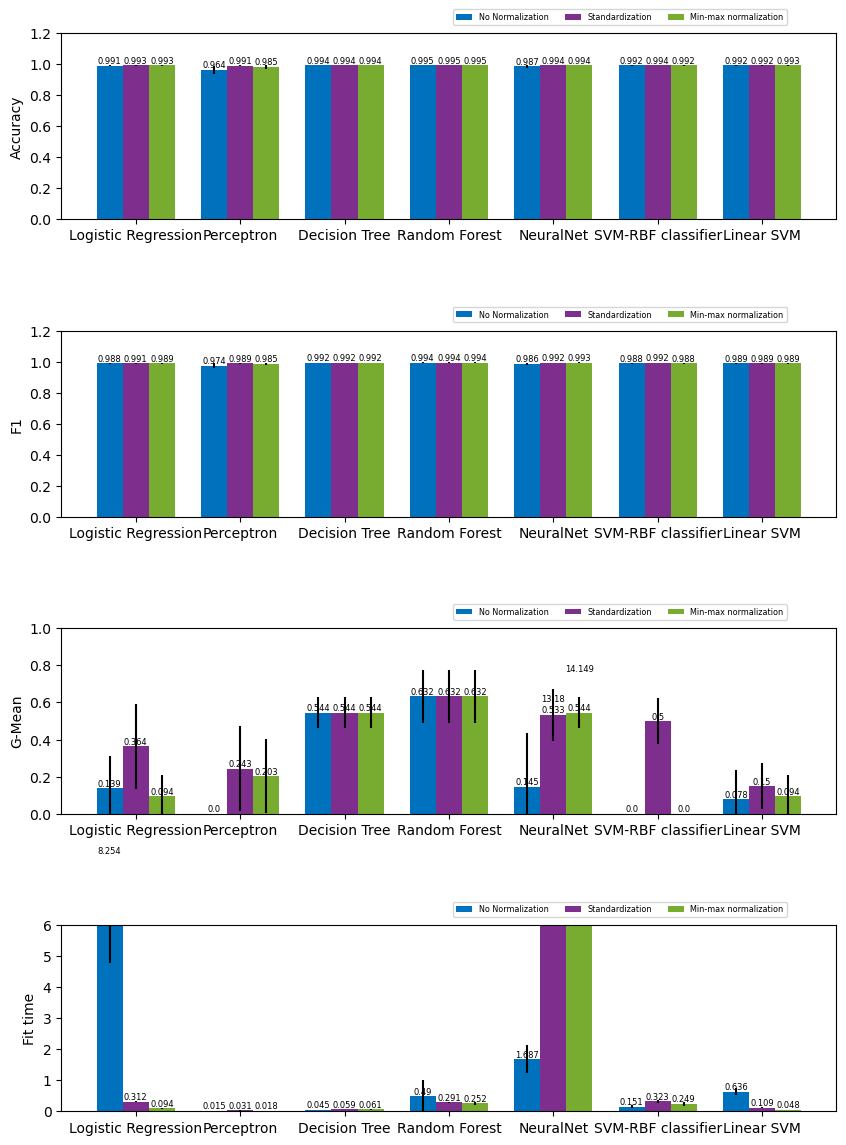

In [17]:
# Define classifiers
classifiers2 = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',max_iter=5000,random_state=1),
    'Perceptron': Perceptron(random_state=1),
    'Decision Tree': DecisionTreeClassifier(criterion = 'gini', max_depth = 4,random_state = 1),
    'Random Forest': RandomForestClassifier(criterion='gini', n_estimators=25,random_state=1, n_jobs=2),
    'Neural Network': MLPClassifier(activation = 'relu',max_iter = 1000,random_state=1),
    'Svm Rbf': SVC(kernel='rbf',random_state=1),
    'SVC Linear': LinearSVC(dual=False, random_state=1),
}

# Define scalers
scalers = {
    'No Normalization': None,
    'Standardization': StandardScaler(),
    'Min-max normalization': MinMaxScaler()
}

#define scores
scorers = {
'accuracy_score': make_scorer(accuracy_score),
'f1_score': make_scorer(f1_score, average='weighted'),
'precision_score': make_scorer(precision_score, average='weighted',zero_division=0),
'recall_score': make_scorer(recall_score,average='weighted'),
'G_mean':make_scorer(geometric_mean_score, average='binary')}

plt.figure(figsize=(15,3),dpi=150)
bar_width = 0.25

#names of the classifiers for the labes of the bars
clf_names = ['Logistic Regression','Perceptron','Decision Tree','Random Forest','NeuralNet','SVM-RBF classifier','Linear SVM']
x_label = np.arange(7) 

fig, ax = plt.subplots(4, 1,figsize=(10, 14))
plt.subplots_adjust(hspace=0.6)

#random permutations cross-validation(Shuffle & Split) for better results 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)


i = 0
# Loop through classifiers and scalers
for clf_name, clf in classifiers2.items():
    j = 0
    for scaler_name, scaler in scalers.items():

        # Prepare the data with the current scaler if needed
        if scaler is not None:
            X2_scaled = scaler.fit_transform(X2)
        else:
            X2_scaled = X2
            
        #define pipeline
        pipe = Pipeline([(scaler_name, scaler), (clf_name,clf)])
        
        #cross validate with the help of the pipeline
        cv_results = cross_validate(pipe, X2_scaled, Y2, cv=cv, scoring=scorers, return_train_score=True,error_score='raise')

        #define scorers
        accuracy2 = cv_results['test_accuracy_score'].mean()
        f12 = cv_results['test_f1_score'].mean()
        fit_time2 = cv_results['fit_time'].mean()
        G_mean2 = cv_results['test_G_mean'].mean()

        #define scores with out mean for the std
        accuracy_std2 = np.std(cv_results['test_accuracy_score'])
        f1_std2 = np.std(cv_results['test_f1_score'])
        G_mean_std2 = np.std(cv_results['test_G_mean'])
        fit_time_std2 = np.std(cv_results['fit_time'])
  
        if scaler_name == 'Standardization':
            color = '#7E2F8E'
        elif scaler_name == 'Min-max normalization':
            color = '#77AC30'
        else:
            color = '#0072BD'
        if i == 0:
            ax[0].bar(i + j * bar_width, accuracy2, width=bar_width, color=color, yerr=accuracy_std2,label=scaler_name)
            ax[0].text(i + j * bar_width, accuracy2, f"{round(accuracy2, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f12, width=bar_width, color=color,yerr=f1_std2, label=scaler_name)
            ax[1].text(i + j * bar_width, f12, f"{round(f12, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean2, width=bar_width, color=color,yerr=G_mean_std2, label=scaler_name)
            ax[2].text(i + j * bar_width, G_mean2, f"{round(G_mean2, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time2, width=bar_width, color=color,yerr=fit_time_std2, label=scaler_name)
            ax[3].text(i + j * bar_width, fit_time2, f"{round(fit_time2, 3)}", ha='center', va='bottom',fontsize=6)
        else:
            ax[0].bar(i + j * bar_width, accuracy2, width=bar_width, color=color,yerr=accuracy_std2)
            ax[0].text(i + j * bar_width, accuracy2, f"{round(accuracy2, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f12, width=bar_width, color=color,yerr=f1_std2)
            ax[1].text(i + j * bar_width, f12, f"{round(f12, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean2, width=bar_width, color=color,yerr=G_mean_std2)
            ax[2].text(i + j * bar_width, G_mean2, f"{round(G_mean2, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time2, width=bar_width, color=color,yerr=fit_time_std2)
            ax[3].text(i + j * bar_width, fit_time2, f"{round(fit_time2, 3)}", ha='center', va='bottom',fontsize=6)
        j += 1
    i += 1

ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(x_label + bar_width, clf_names)
ax[0].set_ylim(0, 1.2)
ax[0].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[1].set_ylabel('F1')
ax[1].set_xticks(x_label + bar_width, clf_names)
ax[1].set_ylim(0, 1.2)
ax[1].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[2].set_ylabel('G-Mean')
ax[2].set_xticks(x_label + bar_width, clf_names)
ax[2].set_ylim(0, 1)
ax[2].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[3].set_ylabel('Fit time')
ax[3].set_xticks(x_label + bar_width, clf_names)
ax[3].set_ylim(0, 6)
ax[3].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

plt.show()

Discussion for dataset mc1

As we already mentioned for the previous dataset, the aim of this assignment was to conduct a comprehensive analysis of different classifiers and normalization methods on the each given dataset. Hence, the metrics accuracy, F1 score, G-Mean, and fit time were calculated for this dataset as well.
Let’s see the results:

1. Logistic regression 
In Logistic regression when no normalisation has been used to the dataset, G-mean has the highest value, indicating a good balance between sensitivity and accuracy. We could conclude that, the best overall performance is achieved by standardisation, especially in terms of accuracy and F1. Regarding standard deviation, standardisation adds more variability to the G-mean than the other techniques, when no normalisation of the data has a comparatively high standard deviation in fit time.

2. Perceptron 
In Perceptron classifier, min-max normalization produces the highest accuracy and F1, while standardization results in a relatively small G-mean improvement, this is combined with a significant standard deviation in the G-mean. No Normalisation has serious variability, mainly in accuracy.

3. Decision Tree:
Regardless of the normalisation methods used, Decision Tree performs  remarkably well with high accuracy and G-mean scores. The standard deviation is quite similar among the normalisation techniques and it is remarkably low in G-mean.

4. Random Forest:
Similar behaviour with Decision Trees, we observe in the Random Forest as well. It has good performance with high accuracy and G-mean, and is consistently across normalisation techniques. Same applies for standard deviations. Only in fit time there is notable moderate variability.

5. Neural Network:
Standardisation shows the highest overall performance in neural networks. In this method, the accuracy and G-mean significantly increase, when at the same time the variability in accuracy and F1 is reduced. 

6. SVM RBF:
Again standardisation performs overall better than the other methods for SVM RBF. G-mean significantly improves with standardisation. Its variability is moderate in standardisation, when is negligible for both min-max and no normalisation.

7. Linear SVM:
The G-mean in the absence of normalization is lower than that in the other approaches. Standardisation improves F1, G-mean, and accuracy, while reduces the variability in accuracy and F1. The variability in G-mean when no normalisation is used gets higher.


In summary, we could assume that standardization method generally provides better results, especially for Neural Network, SVM RBF, and SVC Linear. Random Forest always performs well across normalization methods. Likewise, the decision tree performs well, and normalisation techniques barely affect it. Both the above techniques demonstrate low variability. We could also conclude that no normalisation tends to be make the metrics more variable, when standardisation has lower STDs for the majority of models and metrics. Finally, the SVM RBF and Neural Network models show more fit time variability. As we already have mentioned in the other datasets, the choice of the most appropriate classifier should  be made after the careful consideration of the particular use case as well as the requirements of the task.
 

In [18]:
#read the csv and turn it into a panda dataframe
df3 = pd.read_csv('pc3.csv')
#show the 5 first rows to see all the features 
df3.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,2,1,0,0,0,0,1,0.10,0,0.00,...,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,...,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,...,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,...,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,...,3,0.06,19,23,15,7,18,18.18,9,False


In [19]:
#describe the dataset by count,mean,std,min,25%,50%,75%,max
df3.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,...,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,6.546385,9.649392,2.394114,1.317338,4.438260,15.150352,5.497761,0.288714,7.062060,1.566379,...,7.637876,17.726807,0.214255,56.794626,70.227127,22.017274,12.715291,35.770313,14.340467,23.335253
std,9.193725,21.142554,2.911106,3.320541,9.182347,39.377744,10.834772,0.195155,19.025372,1.025317,...,19.799265,35.564286,0.215738,154.823532,190.845052,38.218763,6.899234,52.127212,19.546351,41.496929
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,2.000000,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,...,0.000000,5.000000,0.100000,11.000000,16.000000,7.000000,8.000000,10.000000,0.000000,7.000000
50%,3.000000,5.000000,1.000000,0.000000,0.000000,8.000000,3.000000,0.250000,4.000000,2.000000,...,4.000000,10.000000,0.160000,25.000000,33.000000,13.000000,12.000000,20.000000,2.600000,13.000000
75%,8.500000,11.000000,3.000000,1.000000,5.000000,16.000000,6.000000,0.330000,8.000000,2.000000,...,8.000000,19.000000,0.250000,58.000000,72.000000,26.000000,16.000000,44.000000,25.000000,26.000000
max,77.000000,589.000000,24.000000,42.000000,78.000000,1148.000000,299.000000,1.240000,570.000000,5.000000,...,574.000000,963.000000,2.000000,4015.000000,5590.000000,787.000000,68.000000,891.000000,93.940000,817.000000


In [20]:
#give the info about the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1563 non-null   int64  
 1   BRANCH_COUNT                     1563 non-null   int64  
 2   CALL_PAIRS                       1563 non-null   int64  
 3   LOC_CODE_AND_COMMENT             1563 non-null   int64  
 4   LOC_COMMENTS                     1563 non-null   int64  
 5   CONDITION_COUNT                  1563 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            1563 non-null   int64  
 7   CYCLOMATIC_DENSITY               1563 non-null   float64
 8   DECISION_COUNT                   1563 non-null   int64  
 9   DECISION_DENSITY                 1563 non-null   float64
 10  DESIGN_COMPLEXITY                1563 non-null   int64  
 11  DESIGN_DENSITY                   1563 non-null   float64
 12  EDGE_COUNT          

In [21]:
#create target column which has the target values of each row for defects
df3['target'] = df3['c'].astype(int)
#count how many True or False defects we have to see the balance of the set 
df3['c'].value_counts()  

c
False    1403
True      160
Name: count, dtype: int64

In [22]:
#remove the 0 or 1 and True or False columns to make the feature dataset
A3 = df3.drop(['c','target'], axis=1)
X3 = np.array(A3)

#convert all to float and make them an array
X3 = X3.astype(np.float32)
Y3 = np.array(df3['target'])

#see the shape of the arrays to check if the arrays has the right dimensions
print(X3.shape)
print(Y3.shape)

(1563, 37)
(1563,)


<Figure size 2250x450 with 0 Axes>

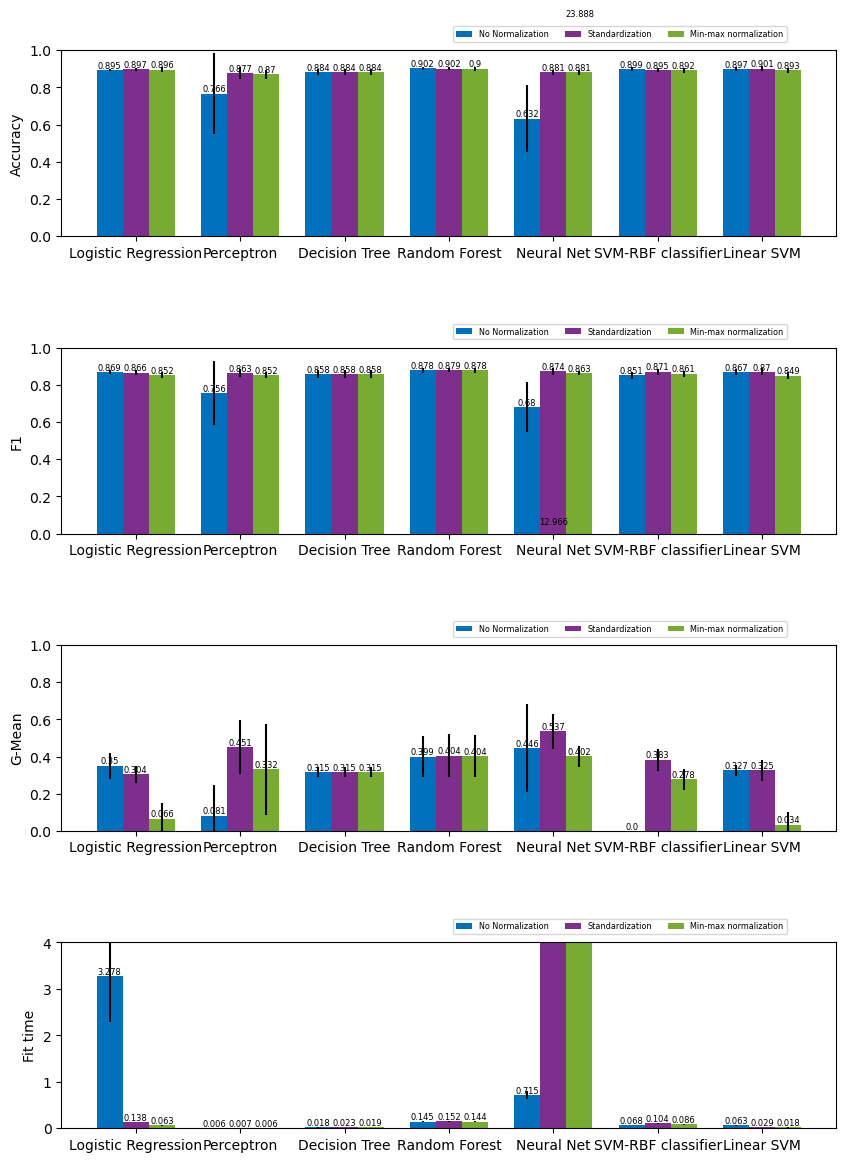

In [23]:
# Define classifiers
classifiers3 = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',max_iter=10000,random_state=1),
    'Perceptron': Perceptron(random_state=1),
    'Decision Tree': DecisionTreeClassifier(criterion = 'gini', max_depth = 4,random_state = 1),
    'Random Forest': RandomForestClassifier(criterion='gini', n_estimators=25,random_state=1, n_jobs=2),
    'Neural Network': MLPClassifier(activation = 'relu', max_iter=1500,random_state=1 ),
    'Svm Rbf': SVC(kernel='rbf', C=20,random_state=1),
    'SVC Linear': LinearSVC(dual=False, random_state=1)
}

# Define scalers
scalers = {
    'No Normalization': None,
    'Standardization': StandardScaler(),
    'Min-max normalization': MinMaxScaler()
}

#define scores
scorers = {
'accuracy_score': make_scorer(accuracy_score),
'f1_score': make_scorer(f1_score, average='weighted'),
'precision_score': make_scorer(precision_score, average='weighted',zero_division=0),
'recall_score': make_scorer(recall_score,average='weighted'),
'G_mean':make_scorer(geometric_mean_score, average='binary')}

plt.figure(figsize=(15,3),dpi=150)
bar_width = 0.25

#names of the classifiers for the labes of the bars
clf_names = ['Logistic Regression','Perceptron','Decision Tree','Random Forest','Neural Net','SVM-RBF classifier','Linear SVM']
x_label = np.arange(7) 

fig, ax = plt.subplots(4, 1,figsize=(10, 14))
plt.subplots_adjust(hspace=0.6)

#random permutations cross-validation(Shuffle & Split) for better results
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

i = 0
# Loop through classifiers and scalers
for clf_name, clf in classifiers3.items():
    j = 0
    for scaler_name, scaler in scalers.items():

        # Prepare the data with the current scaler if needed
        if scaler is not None:
            X3_scaled = scaler.fit_transform(X3)
        else:
            X3_scaled = X3
            
        #define pipeline
        pipe = Pipeline([(scaler_name, scaler), (clf_name,clf)])
        
        #cross validate with the help of the pipeline
        cv_results = cross_validate(pipe, X3_scaled, Y3, cv=cv, scoring=scorers, return_train_score=True,error_score='raise')

        #define scorers
        accuracy3 = cv_results['test_accuracy_score'].mean()
        f13 = cv_results['test_f1_score'].mean()
        fit_time3 = cv_results['fit_time'].mean()
        G_mean3 = cv_results['test_G_mean'].mean()

        #define scores with out mean for the std
        accuracy_std3 = np.std(cv_results['test_accuracy_score'])
        f1_std3 = np.std(cv_results['test_f1_score'])
        G_mean_std3 = np.std(cv_results['test_G_mean'])
        fit_time_std3 = np.std(cv_results['fit_time'])

        if scaler_name == 'Standardization':
            color = '#7E2F8E'
        elif scaler_name == 'Min-max normalization':
            color = '#77AC30'
        else:
            color = '#0072BD'
        if i == 0:
            ax[0].bar(i + j * bar_width, accuracy3, width=bar_width, color=color, yerr=accuracy_std3,label=scaler_name)
            ax[0].text(i + j * bar_width, accuracy3, f"{round(accuracy3, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f13, width=bar_width, color=color,yerr=f1_std3, label=scaler_name)
            ax[1].text(i + j * bar_width, f13, f"{round(f13, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean3, width=bar_width, color=color,yerr=G_mean_std3, label=scaler_name)
            ax[2].text(i + j * bar_width, G_mean3, f"{round(G_mean3, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time3, width=bar_width, color=color,yerr=fit_time_std3, label=scaler_name)
            ax[3].text(i + j * bar_width, fit_time3, f"{round(fit_time3, 3)}", ha='center', va='bottom',fontsize=6)
        else:
            ax[0].bar(i + j * bar_width, accuracy3, width=bar_width, color=color,yerr=accuracy_std3)
            ax[0].text(i + j * bar_width, accuracy3, f"{round(accuracy3, 3)}", ha='center', va='bottom',fontsize=6)
            ax[1].bar(i + j * bar_width, f13, width=bar_width, color=color,yerr=f1_std3)
            ax[1].text(i + j * bar_width, f13, f"{round(f13, 3)}", ha='center', va='bottom',fontsize=6)
            ax[2].bar(i + j * bar_width, G_mean3, width=bar_width, color=color,yerr=G_mean_std3)
            ax[2].text(i + j * bar_width, G_mean3, f"{round(G_mean3, 3)}", ha='center', va='bottom',fontsize=6)
            ax[3].bar(i + j * bar_width, fit_time3, width=bar_width, color=color,yerr=fit_time_std3)
            ax[3].text(i + j * bar_width, fit_time3, f"{round(fit_time3, 3)}", ha='center', va='bottom',fontsize=6)
        j += 1
    i += 1

ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(x_label + bar_width, clf_names)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[1].set_ylabel('F1')
ax[1].set_xticks(x_label + bar_width, clf_names)
ax[1].set_ylim(0, 1)
ax[1].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[2].set_ylabel('G-Mean')
ax[2].set_xticks(x_label + bar_width, clf_names)
ax[2].set_ylim(0, 1)
ax[2].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

ax[3].set_ylabel('Fit time')
ax[3].set_xticks(x_label + bar_width, clf_names)
ax[3].set_ylim(0, 4)
ax[3].legend(loc='upper left',bbox_to_anchor=(0.5, 1.15),fontsize='xx-small',ncol=3)

plt.show()

Discussion for dataset pc3


As we already mentioned for the previous dataset, the aim of this assignment was to conduct a comprehensive analysis of different classifiers and normalization methods on the each given dataset. Hence, the metrics accuracy, F1 score, G-Mean, and fit time were calculated for this dataset as well.
Let’s see the results:


1. Logistic regression 
As we observe, if we don’t normalize the dataset the accuracy and F1 score perform quite well and give quite high results, while the G-mean is relatively low and the fit time is high. The standard deviation for accuracy and F1 score are moderate, while for G-mean and fit time are higher. In case of  standardization, the accuracy and F1 score remain high with lower fit time, but the G-Mean is comparable to no normalization. Regarding the STDs the values are high for accuracy and F1 score, lower for G-mean and very low for fit time. For the min-max normalization, we observe good accuracy and F1 score, lower fit time and lower G-Mean compared to other methods. The STDs in this case are moderate to high for accuracy and F1 score, higher for G-Mean and very low for fit time.

2. Perceptron 
Here no normalization leads to lower accuracy and F1 score, and a very low G-Mean, with extremely fast fit time. Standardization quite improves accuracy, F1 score, and G-Mean, by keeping the fit time fast. Finally min-max normalization results in good accuracy and F1 score, moderate G-Mean and still fast fit time. Regarding the STDs without any normalization technique the values are high for accuracy and F1 score, very low for G-Mean and for fit time. In standardization technique, the STDs are moderate for accuracy and F1 score, for G-Mean and very low for fit time. Finally for min-max normalization the STDs are moderate for accuracy and F1 score, high for G-Mean and very low for fit time.

3. Decision Tree:
In Decision Tree classifier we noticed that for every normalization technique the performance is consistent. The G-Mean is relatively low, indicating room for improvement. Since the outcomes are the same in all normalisation situations regarding the STDs, the standard deviations are insignificant.

4. Random Forest:
In Random Forest classifier we noticed that for every normalization the accuracy is consistently high. The same applies for the F1 score, and quite well also for the G-Mean. Fit times are slightly lower, making it a balanced performer. Regarding the standard deviation computation in the absence of normalisation, the STDs for accuracy and F1 score are moderate, for G-Mean is moderate to high and for fit time is high. For standardization and min-max normalization , the STDs for accuracy, F1 score and G-mean are moderate, but for fit time the STDs is very low in standardization and moderate in min-max normalization.

5. Neural Network:
In Neural Network, in case of no normalization we can see lower accuracy and F1 score and moderate G-Mean. The fit time is relatively high. For standardization the accuracy, F1 score, and G-Mean are improving, but the fit time rises significantly. For min-max normalization, we can see an overall good performance with a balanced trade off between accuracy, F1 score, and G-Mean. Regarding the STDs in the absence of normalization, a high standard deviation for accuracy and F1 score is observed, while for the G-mean take moderate to high value and for the fit time it is moderate. In the case of standardization and min-max normalization, the STDs are moderate for accuracy, F1 score and for G-Mean. For the fit time, we calculated moderate to high values in case of standardization, while in case for min-max normalization the values are high.

6. SVM RBF:
SVM RBF with no normalization of the dataset results in high accuracy and F1 score, moderate fit time, but G-Mean is not relevant indicating a potential issue. For standardization, the results are high accuracy, F1 score, and G-Mean, but slightly higher fit time. Finally for min-max normalization the accuracy and F1 score are both good and the G-Mean is moderate. Regarding the standard deviation for accuracy, F1 score and fit time, it seems moderate for all the normalization techniques. For the STD of the G-mean we see a moderate value in standardization and in min-max normalization, while in the absence of normalization G-mean is constant.

7. Linear SVM:
Linear SVM with no normalization of the dataset results in high accuracy, F1 score, and G-Mean, but moderate fit time. In case of standardization the accuracy, F1 score, and G-Mean remain high, with lower fit time. Finally for the min-max normalization the accuracy, F1 score, and G-Mean are quite good and the fit time gets significantly lower. Regarding the standard deviation for accuracy, F1 score and the G-mean, it seems moderate for all the normalization techniques. For the STD of the fit time we see a moderate value in the absence of normalization, while in case of standardization and in case of min-max normalization the values are very low.


In summary, Random Forest results in high accuracy, F1 score, and G-Mean and  performs consistently good across different scalers. Neural Network  shows a significant difference in performance after the application of normalization techniques. SVM-RBF  in the no normalization case has a potential issue regarding the G-Mean calculation. Decision Tree and Linear SVM are consistent with their performance across different scaling methods. Something that needs to be considered is the trade-off between accuracy and fit time, especially for models with longer fit times. As always we should consider the specifics of our classification problem and choose the combination of the model and the scaler, that fits best with our criteria, whether those are accuracy, balance between precision and recall (F1 score), or a specific metric like G-Mean. Also the possible problem with the G-Mean computation in SVM-RBF needs to be fixed in order to conduct a more precise assessment.
Some further observations regarding the standard deviations is that models tend to appear moderate to high standard deviations for accuracy and F1 score. The highest variability is observed in the Perceptron without normalization. On the other hand, the G-Mean displays different standard deviations across variant models and normalization techniques. The highest variability is observed in Logistic Regression with Min-max normalization and Neural Network. The last metric, the fit time shows low to moderate standard deviations, with some outliers. The highest variability is observed in the Neural Network with Min-max normalization. To conclude, standardization often results in the less variability, while min-max normalization increases variability in certain models. All metrics show significant variability when using a Neural Network without normalisation.
